In [1]:
# 2: Feature Selection:
#   - Identify relevant features: Create heat map displaying correlation between variables (choose features which have high coorelation to response var but low correlation to each other) 
# 3: Model Training:
#   - Split data 80/20
#   - Train the models: Fit the SVM and KNN models to the training data using the selected features.
# 4: Model Evaluation:
#   - Evaluate performance metrics: Use appropriate evaluation metrics such as accuracy, precision, recall, F1-score, or ROC-AUC to assess the performance of the trained models.
#   - Tune hyperparameters: Optimize the hyperparameters of the SVM and KNN models to improve their performance using techniques like grid search or randomized search.
#   - Cross-validation: Validate the models using techniques like k-fold cross-validation to ensure robustness and avoid overfitting.
# 5: Model Interpretation:
#   - Interpret SVM decision boundaries: Analyze the decision boundaries learned by the SVM model to understand the relationships between input features and the predicted classes.
#   - Examine KNN neighbors: Investigate the nearest neighbors used by the KNN model to classify data points, gaining insights into the patterns learned from the data.
# 6: Prediction:
#   - Make predictions: Use the trained SVM and KNN models to predict the GDP growth class and GDP per capita class for new data points.
#   - Evaluate predictions: Assess the accuracy and reliability of the predictions on unseen data.
# 7: Iterative Improvement:
#   - Refine models: Iterate on the modeling process by adjusting features, algorithms, or hyperparameters based on the evaluation results and domain knowledge.
#   - Incorporate feedback: Incorporate feedback from stakeholders or domain experts to improve the predictive performance and interpretability of the models.

In [2]:
#importing libraries required
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
#reading csv and placing in dataframe
file_path = 'Data_Sheet_1_Association between socioeconomic status and arteriosclerotic cardiovascular disease risk and cause-specific and all-cause mortality.CSV'
data = pd.read_csv(file_path)
print(data.head())
data.info()

   Unnamed: 0       Year     seqn  age     sex    eth        marital  poverty  \
0           1  2005-2006  31131.0   44  Female  black        Married     4.65   
1           2  2005-2006  31132.0   70    Male  white        Married     5.00   
2           3  2005-2006  31144.0   21    Male  other  Never married     0.46   
3           4  2005-2006  31149.0   85  Female  white        Widowed     0.05   
4           5  2005-2006  31150.0   79    Male  white       Divorced     1.22   

                         edu     PHQ9  ...  time mortstat_1 status_all  \
0  some college or AA degree  Minimal  ...   159          1          1   
1  college graduate or above  Minimal  ...   167          1          1   
2       high school graduate  Minimal  ...   163          1          1   
3               9-11th grade  Minimal  ...   100          2          2   
4       high school graduate  Minimal  ...    56          2          2   

  Diseases_of_heart_1  status_heart CV_mortality_1 status_CV  \
0   

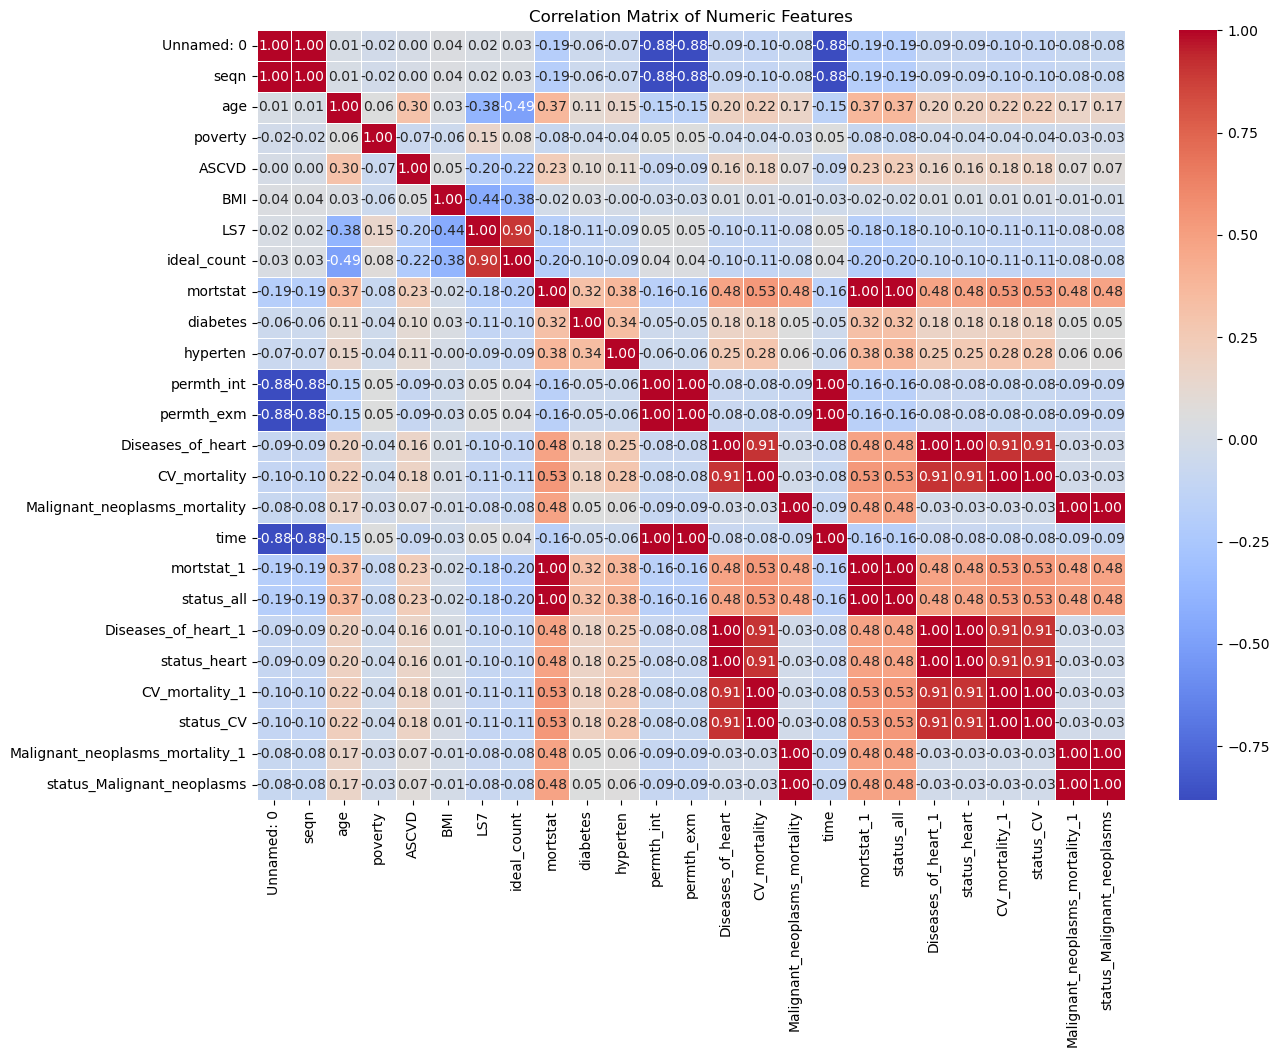

In [4]:
numeric_data = data.select_dtypes(include=['number'])
corr_matrix = numeric_data.corr()

#similiarity/correlation matrix for feature selection
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of Numeric Features')
plt.show()

#based off heat map, best features are the following: age, mortstat, LS7, ideal_count

In [5]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix

In [6]:

eth_mappings = {'black':0, 'white':1, 'other':2, 'mexican':3}
edu_mappings = {'college graduate or above':1, 'high school graduate':2, 'less than 9th grade':3, 'some college or AA degree':4, '9-11th grade':5}
PIR_mappings = {'low income':0, 'middle income':1, 'high income':2}
#data['sex'] = data['sex'].map(sex_mappings)
#data['marital'] = data['marital'].map(marital_mappings)
data['eth'] = data['eth'].map(eth_mappings)
data['edu'] = data['edu'].map(edu_mappings)
data['PIR'] = data['PIR'].map(PIR_mappings)

features = data[['age', 'eth', 'edu', 'PIR']]
target = data['ASCVD']

categorical_columns = features.select_dtypes(include=['object']).columns

features = pd.get_dummies(features, columns=categorical_columns, drop_first=True)

features = features.fillna(features.median())
target = target.fillna(target.median())
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [7]:
#initialize kernel
svm_model = SVC(kernel='linear', random_state=42, class_weight=class_weights_dict)

#train model on dataset
svm_model.fit(X_train, y_train)

#make predictions on dataset
y_pred = svm_model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.686750998668442
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.68      0.80      5408
           1       0.21      0.78      0.33       600

    accuracy                           0.69      6008
   macro avg       0.59      0.73      0.56      6008
weighted avg       0.89      0.69      0.75      6008



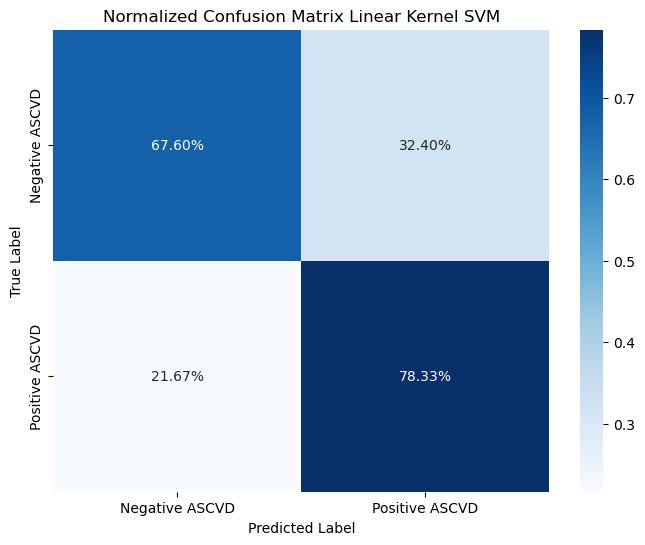

In [9]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = ["Negative ASCVD", "Positive ASCVD"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix Linear Kernel SVM")
plt.show()

In [10]:
#initialize kernel
svm_model = SVC(kernel='poly', random_state=42, class_weight=class_weights_dict)

#train model on dataset
svm_model.fit(X_train, y_train)

#make predictions on dataset
y_pred = svm_model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6711051930758988
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.66      0.78      5408
           1       0.20      0.78      0.32       600

    accuracy                           0.67      6008
   macro avg       0.58      0.72      0.55      6008
weighted avg       0.89      0.67      0.74      6008



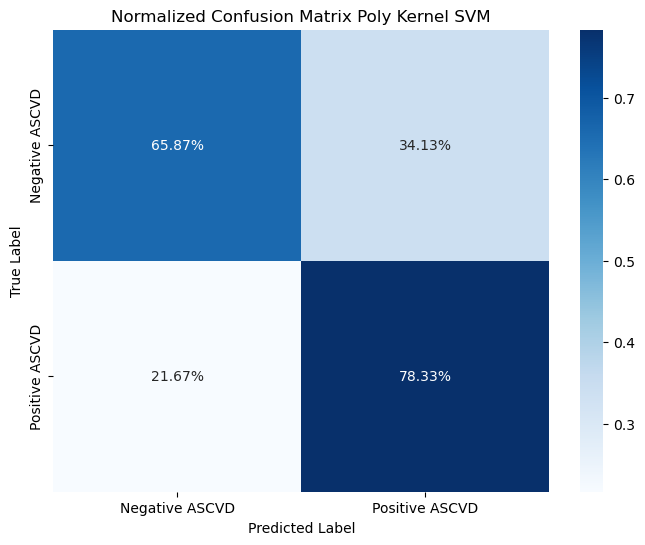

In [11]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = ["Negative ASCVD", "Positive ASCVD"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix Poly Kernel SVM")
plt.show()

In [12]:
#initialize kernel
svm_model = SVC(kernel='rbf', random_state=42, class_weight=class_weights_dict)

#train model on dataset
svm_model.fit(X_train, y_train)

#make predictions on dataset
y_pred = svm_model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6714380825565912
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.66      0.78      5408
           1       0.21      0.81      0.33       600

    accuracy                           0.67      6008
   macro avg       0.59      0.73      0.56      6008
weighted avg       0.89      0.67      0.74      6008



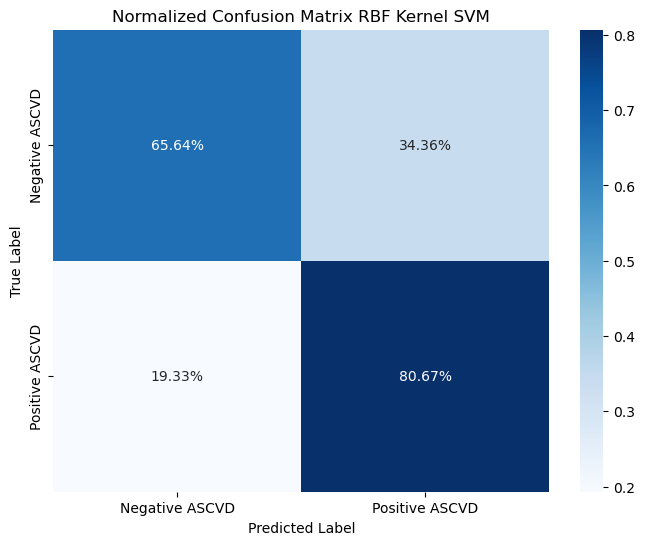

In [13]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = ["Negative ASCVD", "Positive ASCVD"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix RBF Kernel SVM")
plt.show()

In [14]:
#initialize kernel
svm_model = SVC(kernel='sigmoid', random_state=42, class_weight=class_weights_dict)

#train model on dataset
svm_model.fit(X_train, y_train)

#make predictions on dataset
y_pred = svm_model.predict(X_test)

#evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6374833555259654
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.64      0.76      5408
           1       0.15      0.59      0.24       600

    accuracy                           0.64      6008
   macro avg       0.54      0.62      0.50      6008
weighted avg       0.86      0.64      0.71      6008



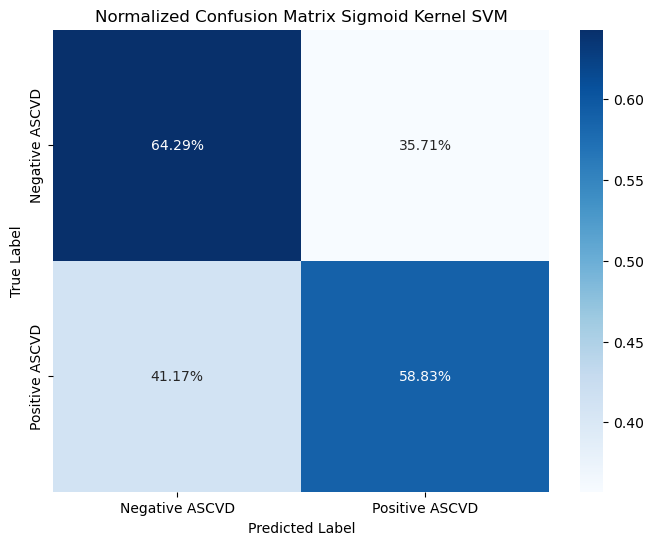

In [15]:
cm = confusion_matrix(y_test, y_pred)

cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

labels = ["Negative ASCVD", "Positive ASCVD"]

plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2%", xticklabels=labels, yticklabels=labels, cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix Sigmoid Kernel SVM")
plt.show()